# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data\Advertising.csv", index_col=0)
df

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\vipre\AppData\Local\Temp\ipykernel_73956\532407860.py:1: SyntaxWarning: invalid escape sequence '\A'
  df = pd.read_csv("data\Advertising.csv", index_col=0)


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0
...,...,...,...,...
195,38.2,3.7,13.8,7600.0
196,94.2,4.9,8.1,9700.0
197,177.0,9.3,6.4,12800.0
198,283.6,42.0,66.2,25500.0


## Exploratory Data Analysis 

In [4]:
df.head(5)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [6]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14022.500000
std,85.854236,14.846809,21.778621,5217.456566
min,0.700000,0.000000,0.300000,1600.000000
25%,74.375000,9.975000,12.750000,10375.000000
50%,149.750000,22.900000,25.750000,12900.000000
75%,218.825000,36.525000,45.100000,17400.000000
max,296.400000,49.600000,114.000000,27000.000000


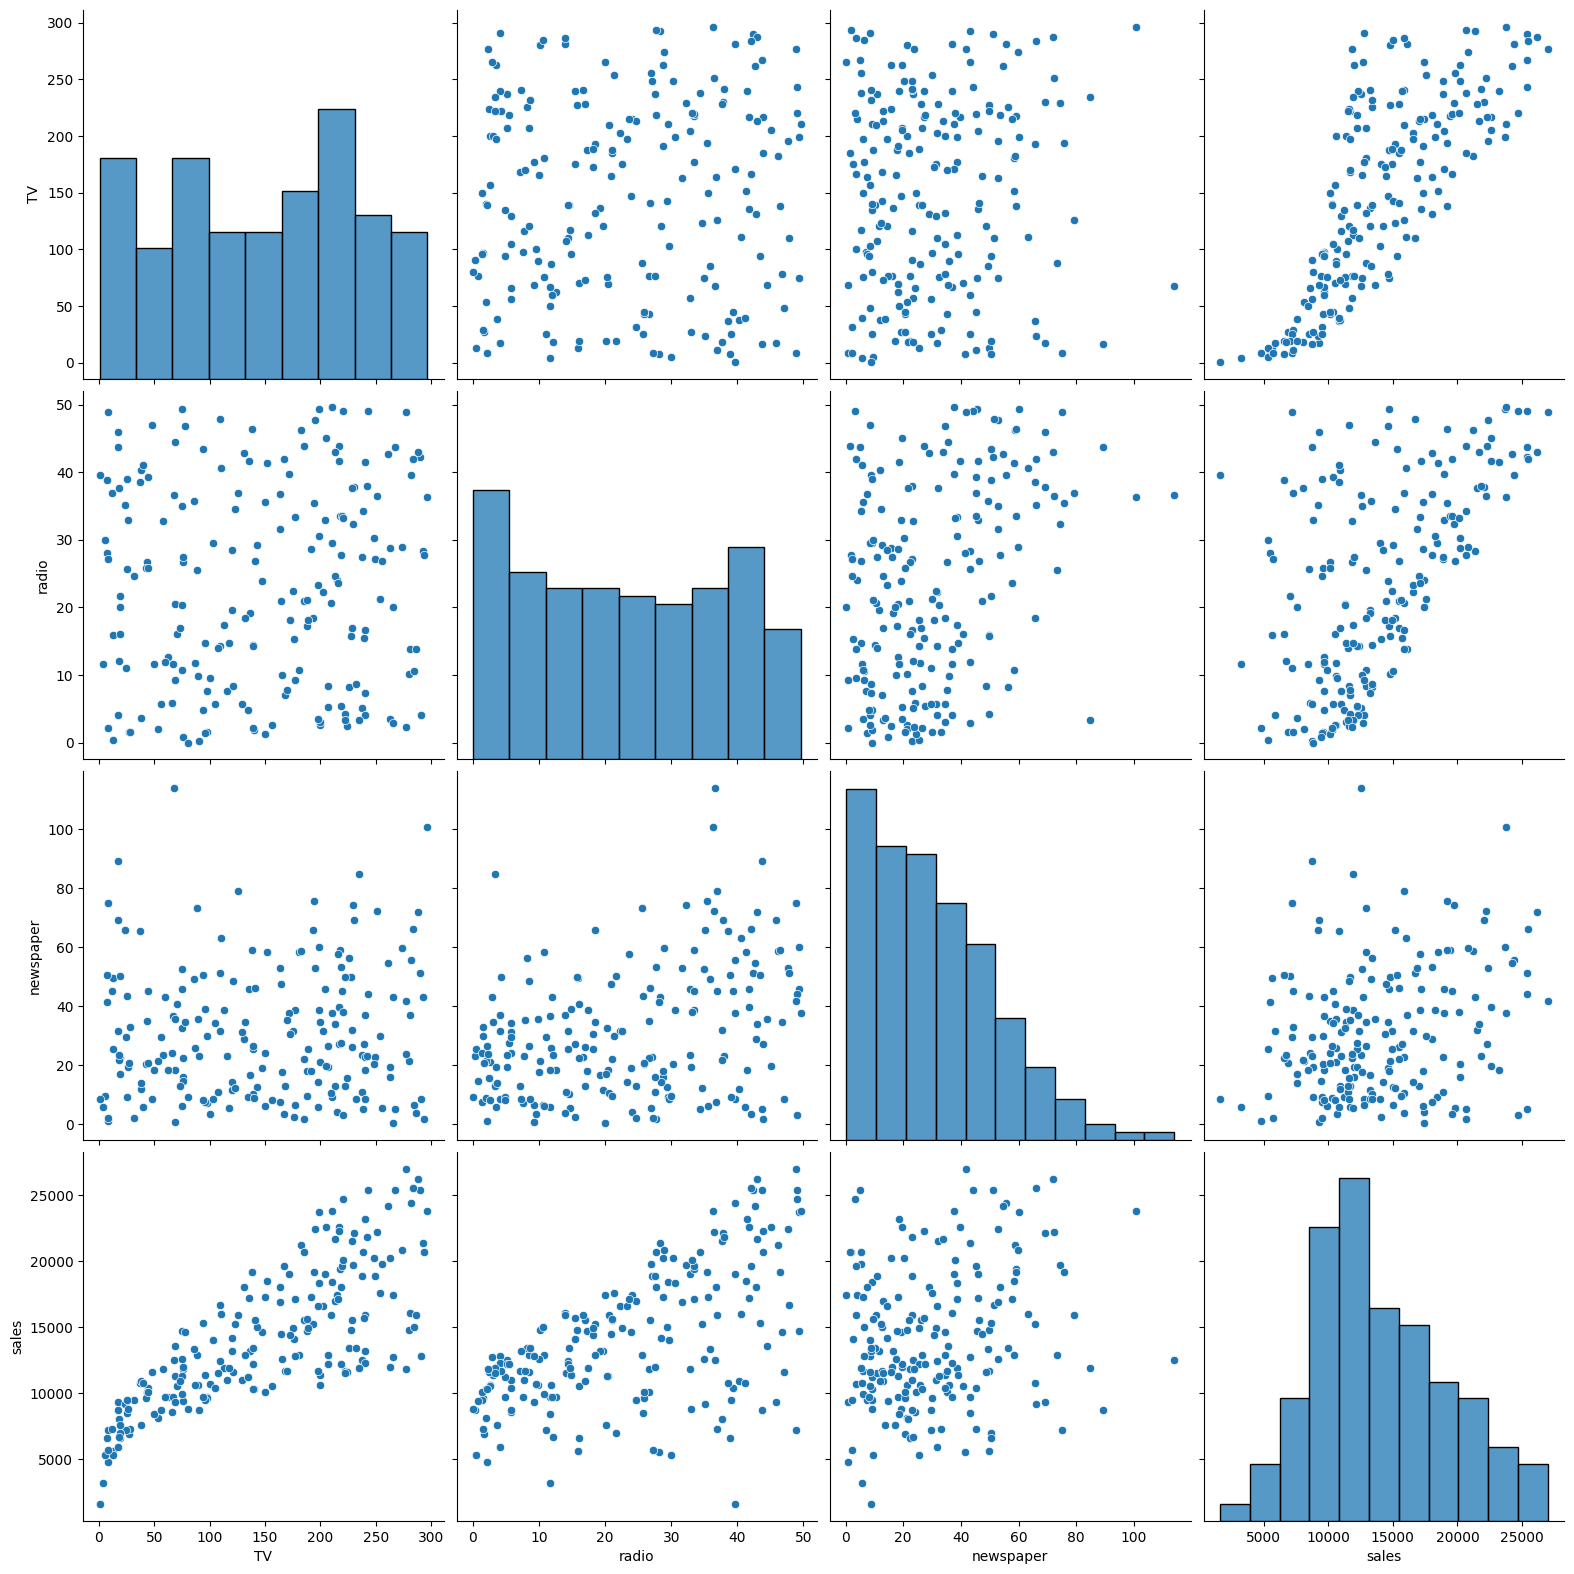

In [7]:
#pairplot

sns.pairplot(data=df, height=4, vars=df.iloc[:,:])

<Axes: >

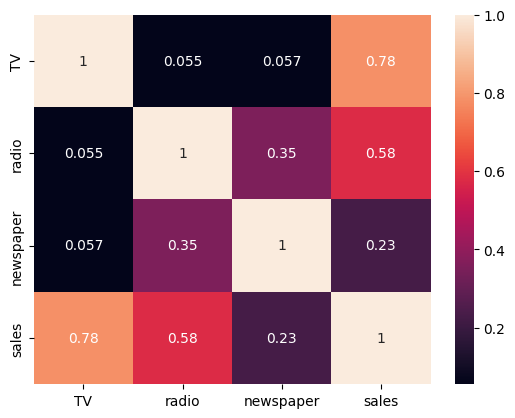

In [8]:
#heatmap

sns.heatmap(df.corr(), annot=True)

## Modelado

In [71]:
X = df.drop(columns=["sales"]) #tv, radio y newspaper
y = df["sales"] #sales

In [48]:
from sklearn import preprocessing

# std_scale = preprocessing.StandardScaler().fit(X)
# X = std_scale.transform(X)

#model_Scal = LinearRegression()
#diabetes_model_Scal.fit(data_train_Scal,target_train)

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 ) 

In [74]:
#Miramos los shape de cada test y train para ver si lo hemos hecho bien

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


In [76]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [77]:
y_pred = lr.predict(X_test)
y_pred

array([16408.02420323, 20889.88208715, 21553.84317909, 10608.50256198,
       22112.37325986, 13105.59172402, 21057.19191631,  7461.01034456,
       13606.34580543, 15155.06966892,  9048.3199241 ,  6653.28312494,
       14345.54486508,  8903.49332887,  9689.59028038, 12164.94385914,
        8736.28397336, 16265.07257725, 10277.59582057, 18831.0910344 ,
       19560.36653309, 13251.0346424 , 12336.20694824, 21306.95131746,
        7827.40305075,  5809.57447807, 20757.53231451, 11981.3807742 ,
        9183.4957628 ,  8506.69910015, 12466.46769342, 10003.37695121,
       21387.67090231, 12249.6636755 , 18266.61537608, 20137.66266542,
       14055.14005278, 20854.11186286, 11017.44410014,  4568.99622215])

In [78]:
#instancia y fit del modelo lineal

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))
print("MAPE test", mean_absolute_percentage_error(y_test, y_pred))
print("RMSE test", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE test 1460.7567168117598
MSE test 3174097.3539761035
MAPE test 0.15198846602831229
RMSE test 1781.59966153345


In [79]:
#instancia y fit del modelo lineal


print('MAE test', )
print('MSE test', )
print('MAPE test', )
print('RMSE test', )

MAE test
MSE test
MAPE test
RMSE test


In [80]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 10)
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [81]:
y_pred = lr.predict(X_test)
y_pred

baseline_error = mean_squared_error(y_test, y_pred)

In [82]:
# instancia y fit del ridge

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))
print("MAPE test", mean_absolute_percentage_error(y_test, y_pred))
print("RMSE test", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE test 1460.7567168117598
MSE test 3174097.3539761035
MAPE test 0.15198846602831229
RMSE test 1781.59966153345


In [67]:
print('MAE test', )
print('MSE test', )
print('RMSE test', )

MAE test 1361.6785049651596
MSE test 4401206.97804551
RMSE test 2097.905378715997


In [83]:
n_alphas = 40
alphas = np.logspace(1, 5, n_alphas) 
alphas

array([1.00000000e+01, 1.26638017e+01, 1.60371874e+01, 2.03091762e+01,
       2.57191381e+01, 3.25702066e+01, 4.12462638e+01, 5.22334507e+01,
       6.61474064e+01, 8.37677640e+01, 1.06081836e+02, 1.34339933e+02,
       1.70125428e+02, 2.15443469e+02, 2.72833338e+02, 3.45510729e+02,
       4.37547938e+02, 5.54102033e+02, 7.01703829e+02, 8.88623816e+02,
       1.12533558e+03, 1.42510267e+03, 1.80472177e+03, 2.28546386e+03,
       2.89426612e+03, 3.66524124e+03, 4.64158883e+03, 5.87801607e+03,
       7.44380301e+03, 9.42668455e+03, 1.19377664e+04, 1.51177507e+04,
       1.91448198e+04, 2.42446202e+04, 3.07029063e+04, 3.88815518e+04,
       4.92388263e+04, 6.23550734e+04, 7.89652287e+04, 1.00000000e+05])

In [84]:
n_alphas = 40
alphas = np.logspace(1, 5, n_alphas) 

coef_ridge = []
err_ridge = []
baseline = []

errors = {}

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    
    coef_ridge.append(ridge.coef_)
    
    y_pred = ridge.predict(X_test)
    ridge_error = mean_squared_error(y_pred, y_test)
    
    err_ridge.append(ridge_error)
    baseline.append(baseline_error)

In [85]:
# alpha buena
alphas[err_ridge.index(min(err_ridge))]

134.33993325989002

<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
C:\Users\vipre\AppData\Local\Temp\ipykernel_73956\1250029551.py:7: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$', fontsize=30)


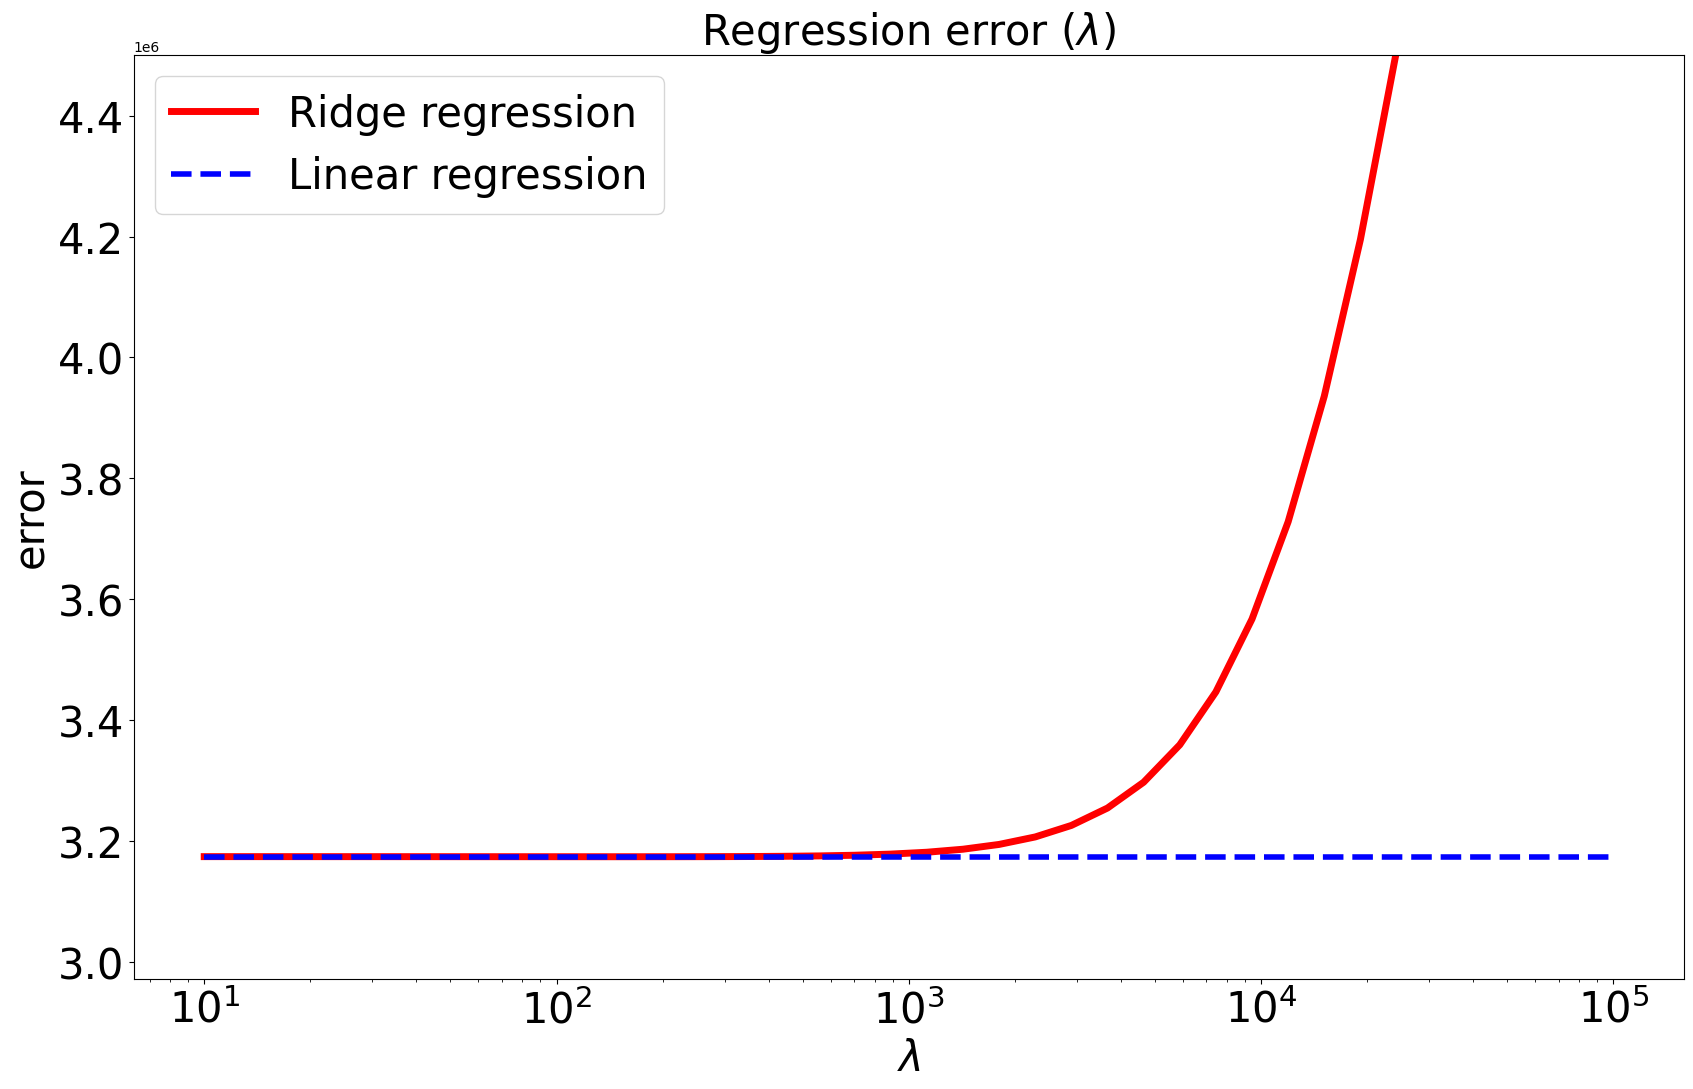

In [86]:
#Soms demasiado buenos y esta grafica os la dejamos.
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas, err_ridge, linewidth=5, color='red', label="Ridge regression")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.ylim(None, 4500000)
plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
C:\Users\vipre\AppData\Local\Temp\ipykernel_73956\1250029551.py:7: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$', fontsize=30)


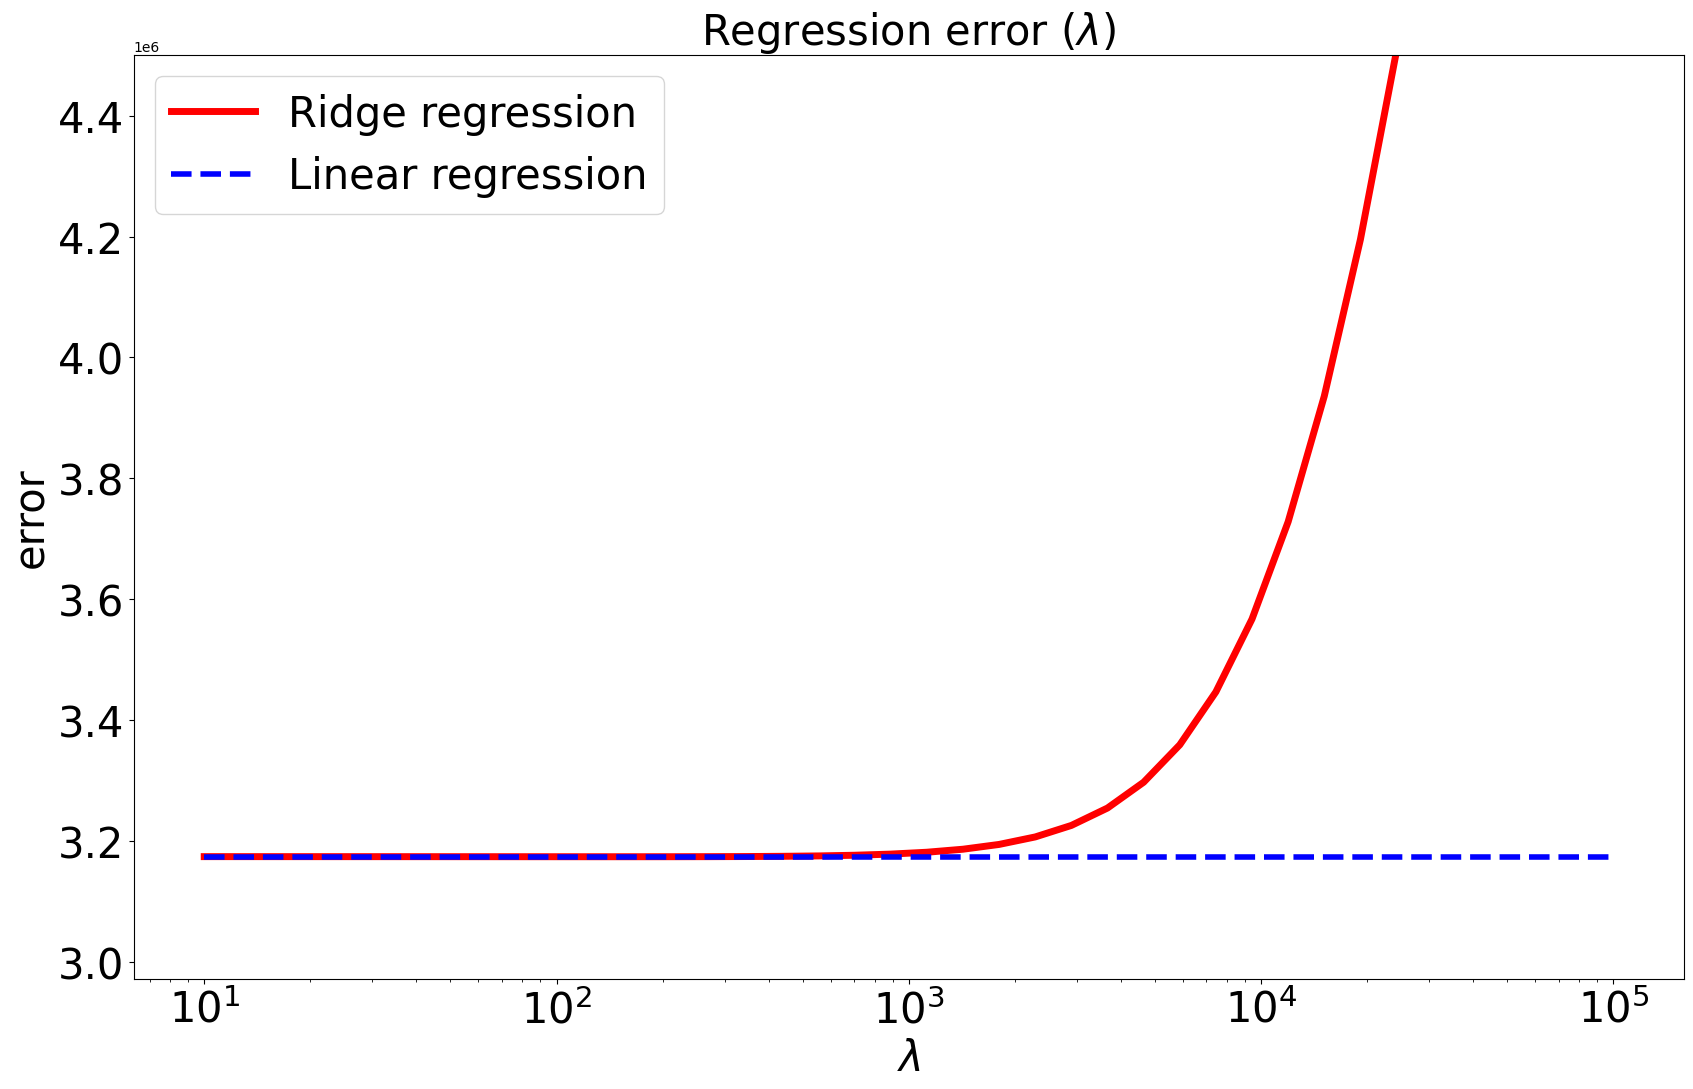

In [87]:
#Soms demasiado buenos y esta grafica os la dejamos.
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas, err_ridge, linewidth=5, color='red', label="Ridge regression")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.ylim(None, 4500000)
plt.show()

In [88]:
print("MAE test", mean_absolute_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))
print("RMSE test", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE test 2016.6803079933422
MSE test 7227197.336049783
RMSE test 2688.3447204645804


In [89]:
# entrenar el Ridge con el mejor alpha, CUIDADO QUE IGUAL NO OS SALE IDENTICO!!!

print('MAE test', )
print('MSE test', )
print('RMSE test', )

MAE test
MSE test
RMSE test


In [90]:
min(err_ridge)

3173910.1154632843

In [91]:
err_ridge.index(min(err_ridge))

11

In [93]:
err_ridge.index(3173910.1154632843)

11

4402118.291449686

In [94]:
lr.coef_

array([ 44.72951747, 189.19505423,   2.76111434])

In [95]:
ridge.coef_

array([42.27511585, 47.11656327, 17.09664929])

array([ 44.58402012, 196.49703416,  -2.78146398])

array([ 44.3748285 , 160.21529916,   4.88765351])

In [104]:
# LIN_REG SCORE

lr.score(y_test, lr.predict(X_test))

c:\Users\vipre\anaconda3\envs\ML\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [39]:
# LIN_REG SCORE

0.8601145185017869

In [38]:
# RIDGE_SCORE

0.8685615216917839

In [105]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)

Lasso(alpha=10)

In [106]:
print("MAE test", mean_absolute_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))
print("RMSE test", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE test 2016.6803079933422
MSE test 7227197.336049783
RMSE test 2688.3447204645804


In [78]:
# REPETIMOS CON LASSO Y ALPHA=10

print('MAE test', )
print('MSE test',)
print('RMSE test', )

MAE test 1361.792507217947
MSE test 4401370.760781586
RMSE test 2097.944413177238


In [107]:
n_alphas = 100
alphas = np.logspace(1, 4, n_alphas) 

coef_lasso = []
err_lasso = []
baseline = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coef_lasso.append(lasso.coef_)
    y_pred = lasso.predict(X_test)
    lasso_error = mean_squared_error(y_pred, y_test)    
    err_lasso.append(lasso_error)

In [110]:
# alpha buena
alphas[err_lasso.index(min(err_lasso))]

2154.4346900318847

In [112]:
min(err_lasso)

3124797.8275267594

In [113]:
err_lasso.index(min(err_lasso))

77

In [116]:
err_lasso.index(3124797.8275267594)

77

4218332.6104639815

91

5722.3676593502205

<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
C:\Users\vipre\AppData\Local\Temp\ipykernel_73956\3132737435.py:6: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$', fontsize=30)


ValueError: x and y must have same first dimension, but have shapes (100,) and (0,)

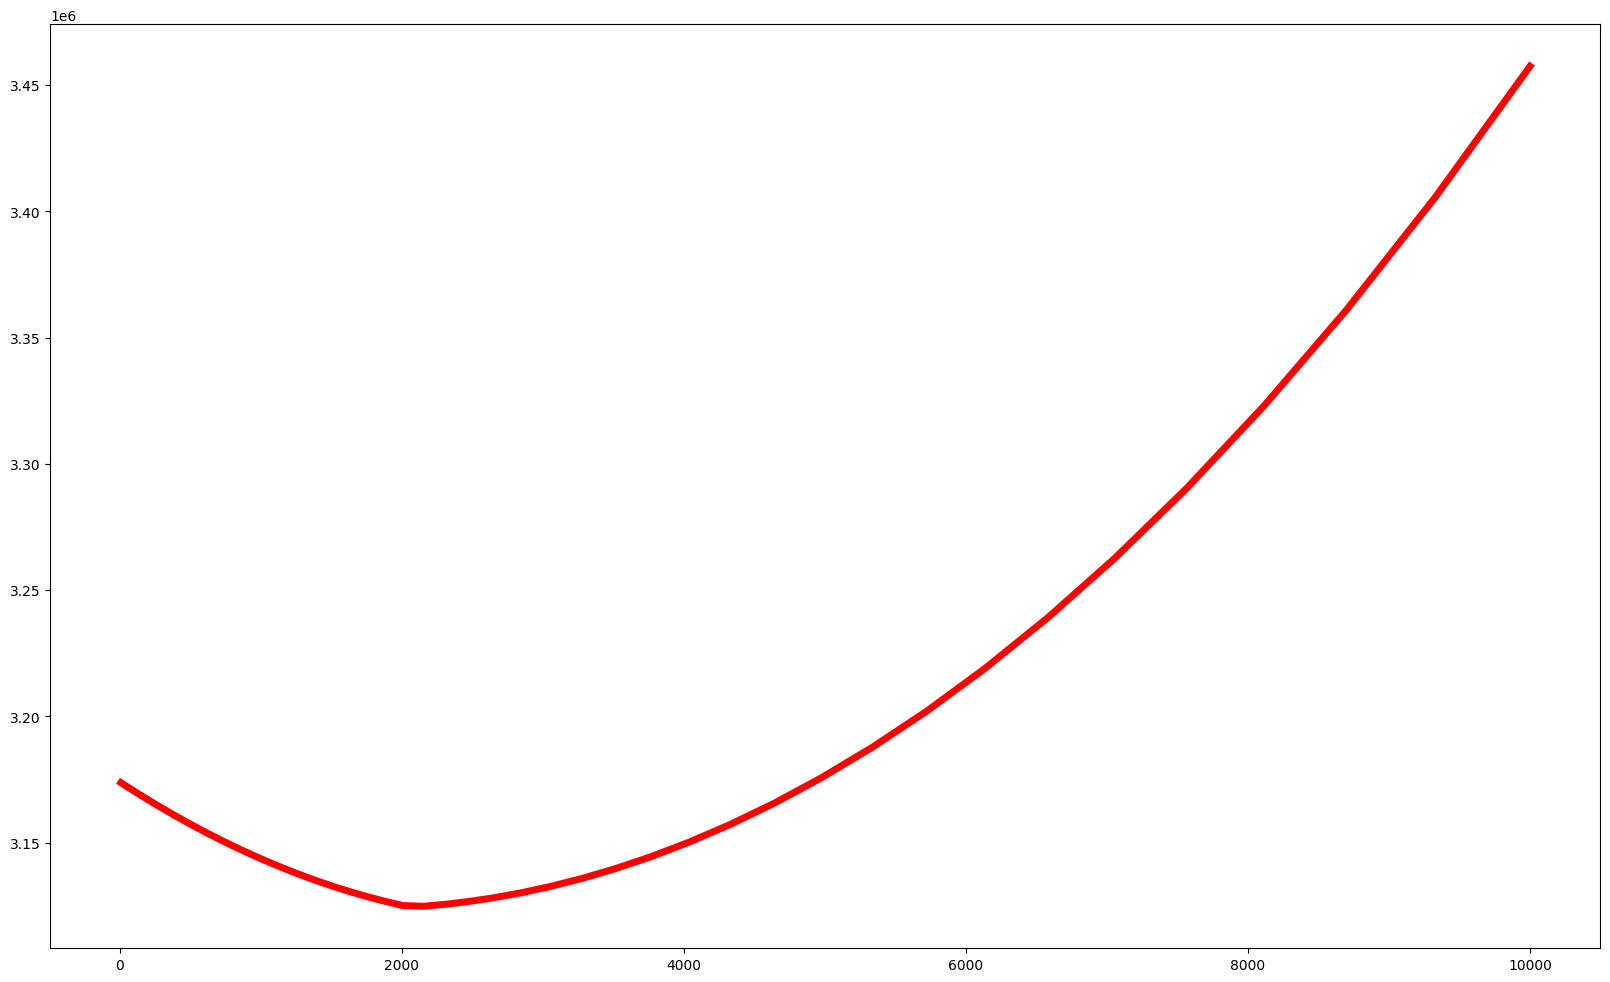

In [117]:
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas, err_lasso, linewidth=5, color='red', label="lasso regression")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

In [82]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=#mejor alpha de lasso)


print('MAE test',)
print('MSE test',)
print('RMSE test',)

MAE test 1340.99995990835
MSE test 4218332.85602747
RMSE test 2053.85804183918


In [92]:
# elasrtnet alpha=1000, r = 0.1

print('MAE test', )
print('MSE test',)
print('RMSE test', )

MAE test 2218.8813260810903
MSE test 8083355.919689266
RMSE test 2843.124323642789


In [93]:
import warnings
warnings.filterwarnings("ignore")

In [94]:
# from sklearn.model_selection import GridSearchCV

# elastic = ElasticNet()

# parameters = {'alpha': np.logspace(0,2,20),
#               'l1_ratio': np.arange(0,1,0.1)
#             }

# elastic_gs = GridSearchCV(elastic, parameters, cv=3, scoring='neg_mean_squared_error', verbose=1)

# elastic_gs.fit(X_train, y_train)


Fitting 3 folds for each of 200 candidates, totalling 600 fits


GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': array([  1.        ,   1.27427499,   1.62377674,   2.06913808,
         2.6366509 ,   3.35981829,   4.2813324 ,   5.45559478,
         6.95192796,   8.8586679 ,  11.28837892,  14.38449888,
        18.32980711,  23.35721469,  29.76351442,  37.92690191,
        48.32930239,  61.58482111,  78.47599704, 100.        ]),
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# buscad alpha y r con el doble bucle

In [100]:


print('MAE test',)
print('MSE test',)
print('RMSE test', )

MAE test 1361.6178647286993
MSE test 4400594.461930206
RMSE test 2097.7593908573513


In [101]:

# ridge = Ridge()

# parameters = {'alpha': np.logspace(0,5,100)
#             }

# ridge_gs = GridSearchCV(ridge, parameters, cv=3, scoring='neg_mean_squared_error', verbose =200)

# ridge_gs.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3; 1/100] START alpha=1.0.................................................
[CV 1/3; 1/100] END ...........alpha=1.0;, score=-1934022.479 total time=   0.0s
[CV 2/3; 1/100] START alpha=1.0.................................................
[CV 2/3; 1/100] END ...........alpha=1.0;, score=-3118333.260 total time=   0.0s
[CV 3/3; 1/100] START alpha=1.0.................................................
[CV 3/3; 1/100] END ...........alpha=1.0;, score=-2731228.109 total time=   0.0s
[CV 1/3; 2/100] START alpha=1.1233240329780274..................................
[CV 1/3; 2/100] END alpha=1.1233240329780274;, score=-1934010.794 total time=   0.0s
[CV 2/3; 2/100] START alpha=1.1233240329780274..................................
[CV 2/3; 2/100] END alpha=1.1233240329780274;, score=-3118339.778 total time=   0.0s
[CV 3/3; 2/100] START alpha=1.1233240329780274..................................
[CV 3/3; 2/100] END alpha=1.1233240329

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9....
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05])},
             scoring='neg_mean_squared_error', verbose=200)

In [104]:


# ridge = Ridge(alpha=1)
# ridge.fit(X_train, y_train)

# print('MAE test', mean_absolute_error(y_test, ridge.predict(X_test)))
# print('MSE test', mean_squared_error(y_test, ridge.predict(X_test)))
# print('RMSE test', np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))

MAE test 1361.7710633068214
MSE test 4402027.062786828
RMSE test 2098.1008228364117


## Resultados

Nos quedmaos con el modelo de Lasso del principio, con un alpha=6000 porque es el modelo que mejor generaliza, o lo que es lo mismo, el modelo que tiene errores más bajos en sus predicciones ante los datos de test.

In [72]:
y

0      22100.0
1      10400.0
2       9300.0
3      18500.0
4      12900.0
        ...   
195     7600.0
196     9700.0
197    12800.0
198    25500.0
199    13400.0
Name: sales, Length: 200, dtype: float64

# BONUS TRACK:

REPETIR RESULTADOS USANDO POLY FEATURES
